Prostate Cance Predictor


Machine Learning project Lifecycle

1. Problem statement

2. Data collection

3. Data Cleaning 

4. Exploratory Data analysis

5. Data pre-processing

6. Model Training

7. Model Selection


1. Understanding the Problem Statement 

This project is aimed at building a machine learning model that can predict the presence of prostate cancer in a patient by varying radius, texture, perimeter, radius etc.

2. Data collection



In [1]:
# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the prostate dataset into a dataframe

prostate_df = pd.read_csv('data/Prostate_Cancer.csv')

In [3]:
#view the first 10 rows of the dataframe

prostate_df.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [4]:
# view the prostate dataset dimensionality
prostate_df.shape

(100, 10)

This is the dataset of 100 patients to implement the machine learning algorithm and thereby interpreting results

The data set consists of 100 observations and 10 variables (out of which 8 numeric variables and one categorical variable and is ID)

3. Data Cleaning

In [5]:
# View the names of the features 

prostate_df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [6]:
prostate_df.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [7]:
prostate_df = prostate_df.drop('id', axis=1)

In [8]:
prostate_df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


In [9]:
# check for missing values

null_values = prostate_df.isnull().sum()
null_values



diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [10]:
# check for dupllicates
duplicate_values = prostate_df.duplicated().sum()

print(duplicate_values)

0


No null or duplicate values

4. Exploratory Data Analysis

In [11]:
# view statistical distribution

prostate_df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


General Observation

The dataset has 100 records for each feature (no missing values as per this summary).

Features include both size-related measures (e.g., radius, perimeter, area) and texture/shape-related ones (e.g., smoothness, compactness, symmetry).

Feature Analysis 

Radius

Mean = 16.85, Std = 4.88 → Moderate spread.
Min = 9, Max = 25 → Wide range.
Median = 17 → Slightly right-skewed distribution (mean < max - median).
Potential Insight: Radius might be a significant feature; size often correlates with malignancy.


Texture

Mean = 18.23, Std = 5.19 → High variation in texture.
Min = 11, Max = 27.

25th to 75th percentile is 14 to 22.25 → Interquartile range (IQR) is ~8.25 → Spread indicates this may help differentiate classes.


Perimeter

Strongly correlated with radius (as expected geometrically).
Mean = 96.78, Max = 172 → Wide spread.
Std = 23.68 → Might benefit from normalization before modeling.

Area

Very wide range: Min = 202, Max = 1878.
Std = 319.71 → High variability.
May have outliers (check values above 1500 — they seem significantly higher than Q3 = 917).

Smoothness

Low mean (0.1027) and low Std (0.0146).
Range is narrow: 0.07 to 0.143 → Most values are tightly clustered.
May need scaling; also, outliers less likely but small differences might still be meaningful.

Compactness

More spread than smoothness (Max = 0.345 vs. Mean = 0.1267).
High max suggests presence of outliers or skewed values.
Worth checking its distribution visually (histogram or boxplot).

Symmetry

Tight spread but max = 0.304 (Mean = 0.193).
Skew might be present — check distribution.
Symmetry is often relevant for cancer classification (malignant tissues often show irregular symmetry).

Fractal Dimension

Least variable feature (Std = 0.008).
Range: 0.053 – 0.097.
Could have limited predictive power unless small changes are highly significant.



In [12]:

#configuration for the default styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

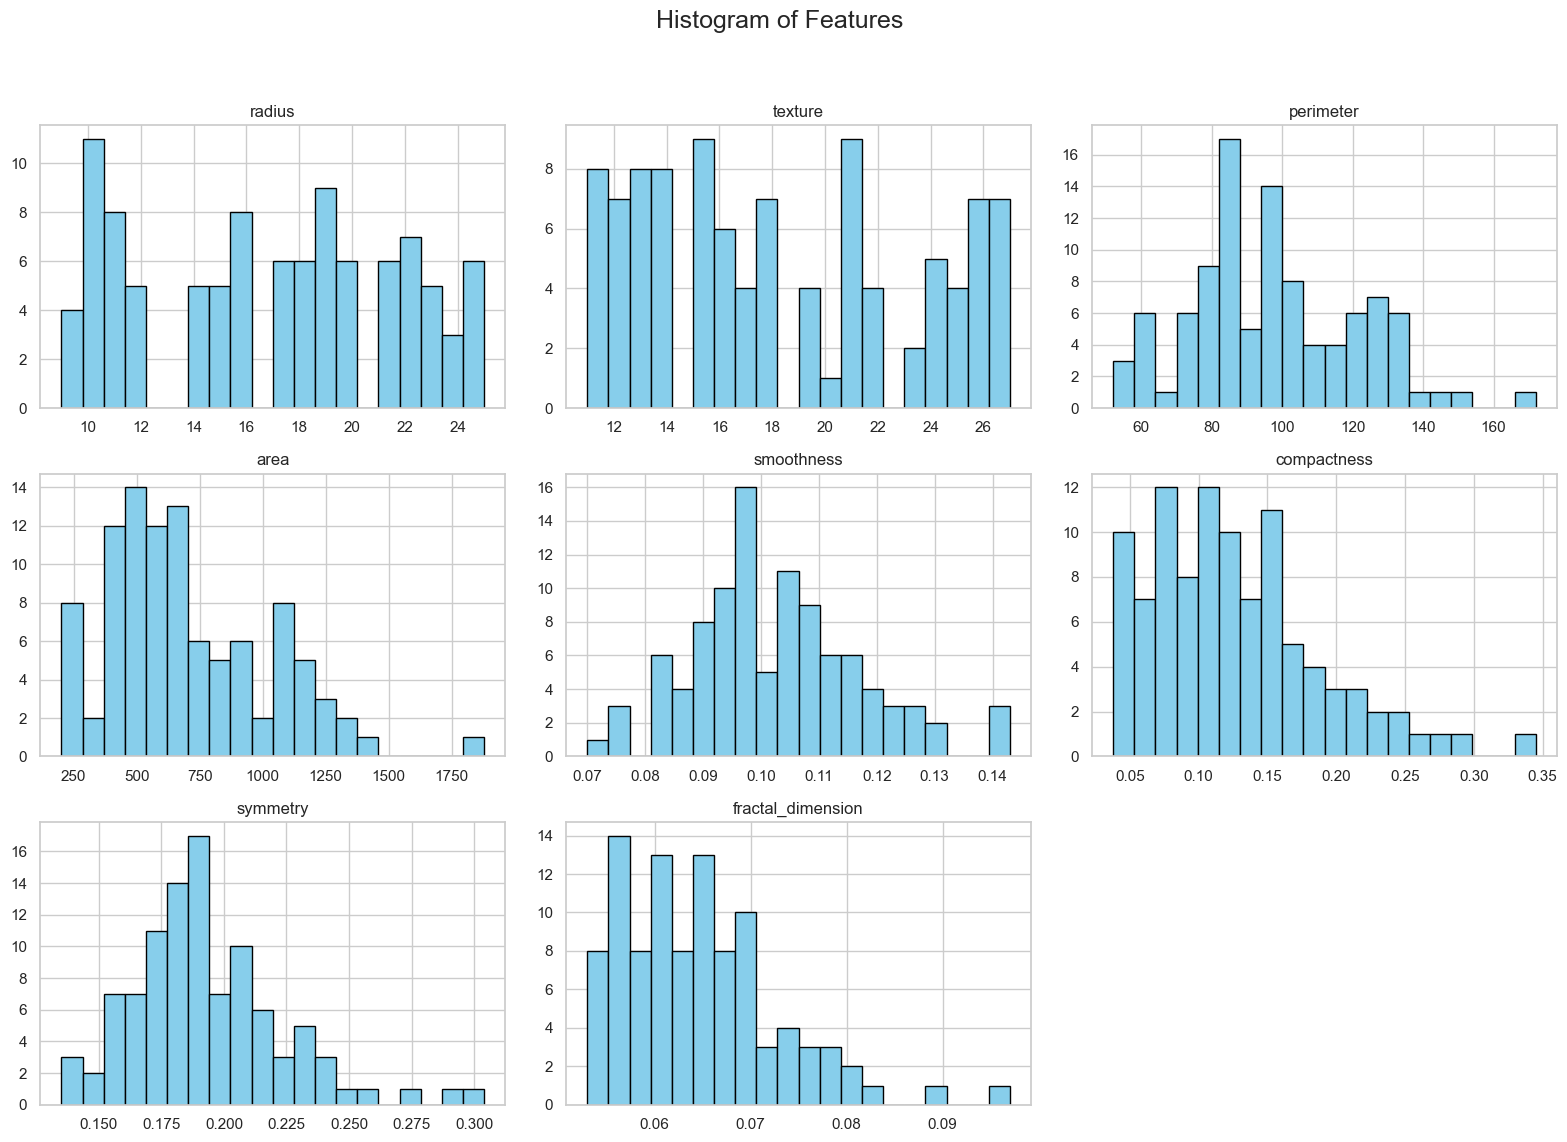

In [13]:
#Histogram of all features

prostate_df.hist(bins=20, color='skyblue', edgecolor ='black', figsize=(16, 12))
plt.suptitle("Histogram of Features", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
# value count for the label(diagnosis_result)
prostate_df['diagnosis_result'].value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [15]:
# label encoding to map 0->M and 1->B

prostate_df['diagnosis_result'] = prostate_df['diagnosis_result'].map({'M':0, 'B':1})

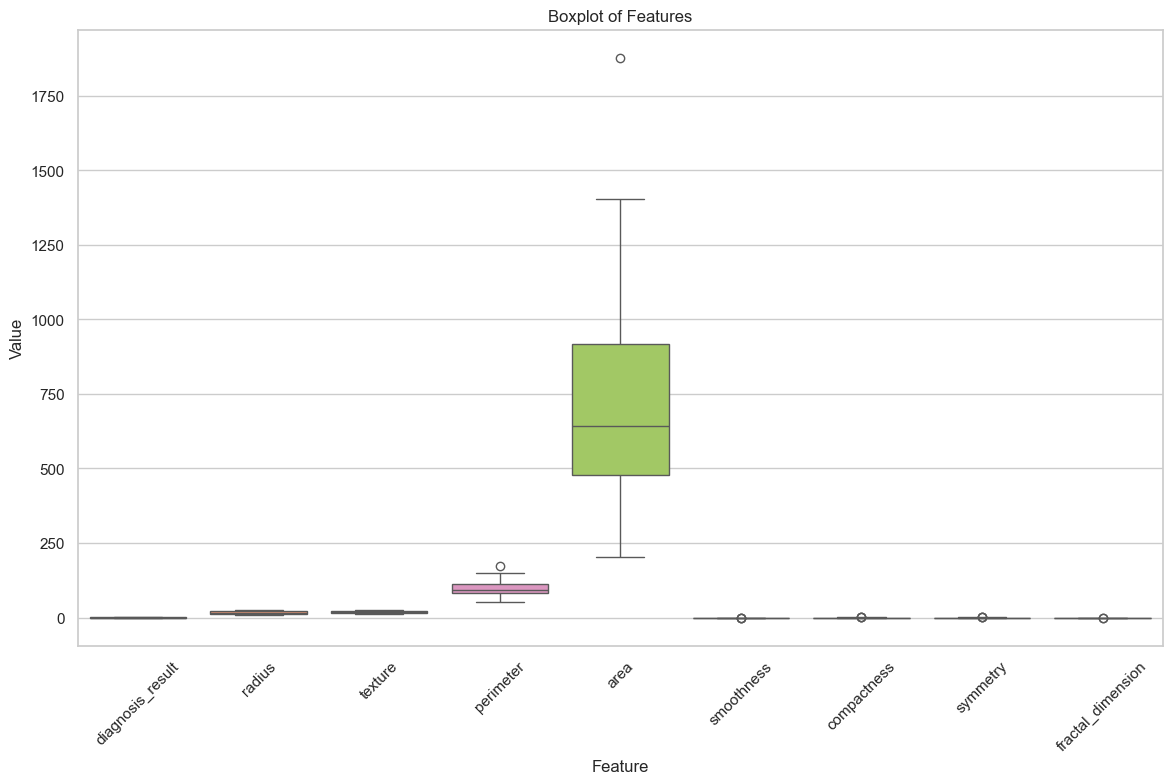

In [16]:
# Boxplot to detect outliers

concat_df = prostate_df.melt(var_name='Feature', value_name='Value' )

plt.figure(figsize=(14, 8))
sns.boxplot(data=concat_df, x='Feature', legend=False, y='Value', palette = 'Set2')
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()

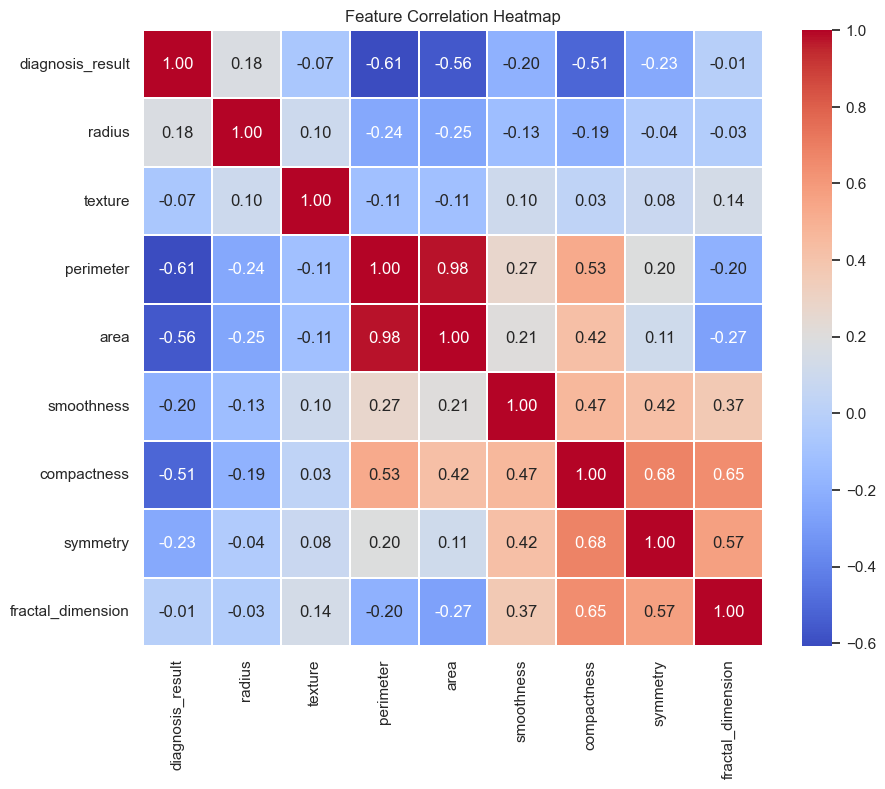

In [17]:
# correlation heatmap of the distribution

corr_mat = prostate_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt =".2f", linewidth=.05)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Save the pre-processed dataset

filename = "processed_prostate.csv"

output_path = os.path.join('data', filename)


# save the dataframe to CSV

prostate_df.to_csv(output_path, index=False)
print(f"Processed dataset saved into: {output_path}")


Processed dataset saved into: data/processed_prostate.csv
